# Modeling

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
terry_df = pd.read_csv('../data/terry_clean.csv')

In [3]:
terry_df.head()

,date,subject_id,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_id,officer_yob,officer_race,officer_gender,officer_squad,initial_call_type,call_type,arrest,frisk,precinct,sector,beat,officer_age
0,2015-10-16,-1,26 - 35,Asian,Male,Arrest,None,7500,1984,Black or African American,M,SOUTH PCT 1ST W - ROBERT,NaN,NaN,0,0.0,South,O,O2,31
1,2015-03-19,-1,26 - 35,Other,Male,Field Contact,None,5670,1965,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,50
2,2015-04-01,-1,26 - 35,Other,Male,Field Contact,None,7539,1963,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,52
3,2015-04-03,-1,26 - 35,Black or African American,Male,Field Contact,None,6973,1977,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,38
4,2015-04-05,-1,26 - 35,Black or African American,Male,Field Contact,None,7402,1973,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,42


In [4]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               44331 non-null  object 
 1   subject_id         44331 non-null  int64  
 2   subject_age        44331 non-null  object 
 3   subject_race       44331 non-null  object 
 4   subject_gender     44331 non-null  object 
 5   stop_resolution    44331 non-null  object 
 6   weapon_type        34687 non-null  object 
 7   officer_id         44331 non-null  int64  
 8   officer_yob        44331 non-null  int64  
 9   officer_race       44331 non-null  object 
 10  officer_gender     44331 non-null  object 
 11  officer_squad      43796 non-null  object 
 12  initial_call_type  31518 non-null  object 
 13  call_type          31518 non-null  object 
 14  arrest             44331 non-null  int64  
 15  frisk              44331 non-null  float64
 16  precinct           347

In [5]:
# changing columns into categories and datetime
terry_df = terry_df.astype({'subject_age': 'category', 'officer_gender':'category', 
                'officer_race': 'category', 'subject_race':'category', 
                'subject_gender':'category', 'date':'datetime64','arrest':'int64', 
                'frisk':'int64','precinct':'category', 'sector':'category',
                'beat': 'category', 'stop_resolution' : 'category', 'weapon_type' : 'category'})

In [6]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               44331 non-null  datetime64[ns]
 1   subject_id         44331 non-null  int64         
 2   subject_age        44331 non-null  category      
 3   subject_race       44331 non-null  category      
 4   subject_gender     44331 non-null  category      
 5   stop_resolution    44331 non-null  category      
 6   weapon_type        34687 non-null  category      
 7   officer_id         44331 non-null  int64         
 8   officer_yob        44331 non-null  int64         
 9   officer_race       44331 non-null  category      
 10  officer_gender     44331 non-null  category      
 11  officer_squad      43796 non-null  object        
 12  initial_call_type  31518 non-null  object        
 13  call_type          31518 non-null  object        
 14  arrest

In [7]:
terry_df.isna().sum()

date                     0
subject_id               0
subject_age              0
subject_race             0
subject_gender           0
stop_resolution          0
weapon_type           9644
officer_id               0
officer_yob              0
officer_race             0
officer_gender           0
officer_squad          535
initial_call_type    12813
call_type            12813
arrest                   0
frisk                    0
precinct              9590
sector                9784
beat                  9731
officer_age              0
dtype: int64

In [8]:
terry_df.describe()

,subject_id,officer_id,officer_yob,arrest,frisk,officer_age
count,4.433100e+04,44331.000000,44331.000000,44331.000000,44331.000000,44331.000000
mean,2.069479e+09,7775.958607,1982.817938,0.059552,0.225012,34.633687
std,3.947564e+09,810.136280,8.780869,0.236658,0.417595,8.452223
min,-1.000000e+00,2768.000000,1946.000000,0.000000,0.000000,21.000000
25%,-1.000000e+00,7522.000000,1978.000000,0.000000,0.000000,28.000000
50%,-1.000000e+00,7765.000000,1985.000000,0.000000,0.000000,33.000000
75%,-1.000000e+00,8442.000000,1989.000000,0.000000,0.000000,39.000000
max,1.755682e+10,8804.000000,1997.000000,1.000000,1.000000,70.000000


In [9]:
terry_df.call_type.value_counts()

911                              19711
ONVIEW                            8412
TELEPHONE OTHER, NOT 911          3098
ALARM CALL (NOT POLICE ALARM)      290
TEXT MESSAGE                         6
SCHEDULED EVENT (RECURRING)          1
Name: call_type, dtype: int64

***
## Preprocessing the Data

In [10]:
# dropping unnecessary columns
df = terry_df.drop(['date', 'subject_id', 'officer_id', 'initial_call_type', 'call_type', 'precinct', 'sector', 'beat', 'officer_squad' ], axis=1, inplace=False)

In [11]:
df.head()

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age
0,26 - 35,Asian,Male,Arrest,None,1984,Black or African American,M,0,0,31
1,26 - 35,Other,Male,Field Contact,None,1965,White,M,0,0,50
2,26 - 35,Other,Male,Field Contact,None,1963,White,M,0,0,52
3,26 - 35,Black or African American,Male,Field Contact,None,1977,White,M,0,0,38
4,26 - 35,Black or African American,Male,Field Contact,None,1973,White,M,0,0,42


In [12]:
df.mode()

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age
0,26 - 35,White,Male,Field Contact,None,1986,White,M,0,0,31


In [13]:
# fill in weapon_type with mode 
df['weapon_type'] = df['weapon_type'].fillna('None')
df.isna().sum()

subject_age        0
subject_race       0
subject_gender     0
stop_resolution    0
weapon_type        0
officer_yob        0
officer_race       0
officer_gender     0
arrest             0
frisk              0
officer_age        0
dtype: int64

#### Some feature engineering

In [14]:
weapons = [] 
for weapon in df['weapon_type']:
    if weapon == 'None': 
        weapons.append(0)
    else:
        weapons.append(1) 
df['has_weapon'] = weapons 
df.head() 

,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_yob,officer_race,officer_gender,arrest,frisk,officer_age,has_weapon
0,26 - 35,Asian,Male,Arrest,None,1984,Black or African American,M,0,0,31,0
1,26 - 35,Other,Male,Field Contact,None,1965,White,M,0,0,50,0
2,26 - 35,Other,Male,Field Contact,None,1963,White,M,0,0,52,0
3,26 - 35,Black or African American,Male,Field Contact,None,1977,White,M,0,0,38,0
4,26 - 35,Black or African American,Male,Field Contact,None,1973,White,M,0,0,42,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   subject_age      44331 non-null  category
 1   subject_race     44331 non-null  category
 2   subject_gender   44331 non-null  category
 3   stop_resolution  44331 non-null  category
 4   weapon_type      44331 non-null  category
 5   officer_yob      44331 non-null  int64   
 6   officer_race     44331 non-null  category
 7   officer_gender   44331 non-null  category
 8   arrest           44331 non-null  int64   
 9   frisk            44331 non-null  int64   
 10  officer_age      44331 non-null  int64   
 11  has_weapon       44331 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 2.0 MB


In [16]:
df.isna().sum()

subject_age        0
subject_race       0
subject_gender     0
stop_resolution    0
weapon_type        0
officer_yob        0
officer_race       0
officer_gender     0
arrest             0
frisk              0
officer_age        0
has_weapon         0
dtype: int64

***
## Define X and y

In [17]:
X = df.drop(['arrest'], axis=1)
y = df['arrest']

***
## Train-test Split

In [18]:
# splitting data into training-testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# creating df with continuous features
cont_feat = X.select_dtypes(exclude = ['object', 'category'])

# removing object and categoricals features in X_train and X_test
X_train_cont = X_train.select_dtypes(exclude = ['object', 'category'])
X_test_cont = X_test.select_dtypes(exclude = ['object', 'category'])

In [20]:
# normalizing the data 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_cont)
scaled_X_test = scaler.transform(X_test_cont)

# converting train data into 
#scaled_df_train = pd.DataFrame(scaled_train, columns=X.columns)

#scaled_df_train.head()

In [21]:
# making df with object and categorical feat.
X_train_cat = X_train.select_dtypes(include = ['object', 'category'])
X_test_cat = X_test.select_dtypes(include = ['object', 'category'])

In [22]:
# OneHotEncode categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [23]:
# fit train and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

In [24]:
# make columns into a df
columns = ohe.get_feature_names(input_features=X_train_cat.columns) 
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns) 
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

In [25]:
columns = cont_feat.columns

In [26]:
# making X_train into a df
X_train_df = pd.DataFrame(scaled_X_train, columns=columns)
X_train_df.head()

,officer_yob,frisk,officer_age,has_weapon
0,0.934555,-0.538593,-0.669853,-0.247972
1,-1.455938,-0.538593,1.459896,-0.247972
2,-1.455938,-0.538593,1.341577,-0.247972
3,-0.089942,-0.538593,-0.196575,-0.247972
4,-1.569771,-0.538593,1.814854,-0.247972


In [27]:
# combining normalized train data and categorical data
X_train = pd.concat([pd.DataFrame(scaled_X_train, columns=columns), cat_train_df], axis=1)
X_test = pd.concat([pd.DataFrame(scaled_X_test, columns=columns), cat_test_df], axis=1)

In [28]:
X_test.head()

,officer_yob,frisk,officer_age,has_weapon,subject_age_1 - 17,subject_age_18 - 25,subject_age_26 - 35,subject_age_36 - 45,subject_age_46 - 55,subject_age_56 and Above,...,officer_race_American Indian/Alaska Native,officer_race_Asian,officer_race_Black or African American,officer_race_Hispanic or Latino,officer_race_Nat Hawaiian/Oth Pac Islander,officer_race_Not Specified,officer_race_Two or More Races,officer_race_White,officer_gender_F,officer_gender_M
0,1.162221,-0.538593,-1.024811,-0.247972,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.114439,-0.538593,1.459896,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.706889,1.856690,-0.669853,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.593056,1.856690,-0.906491,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.431441,-0.538593,0.631661,-0.247972,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [29]:
# Using SMOTE to address class imbalance

# check for class imbalance
print(y_train.value_counts()) 

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    31250
1     1998
Name: arrest, dtype: int64


1    31250
0    31250
Name: arrest, dtype: int64


*** 
## Modeling Using Ensemble Methods
I will use four different ensemble methods for modeling which include KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), and GradientBoostingClassifier(). I will use a pipeline to simplify the process

#### Creating A Pipeline

In [30]:
# list of classifiers
clfs = [KNeighborsClassifier(), 
               RandomForestClassifier(), AdaBoostClassifier(), 
              GradientBoostingClassifier()]

In [31]:
# created a function to determine metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [32]:
# create a four loop to run pipeline thru classifiers list
for clf in clfs:
    pipe = Pipeline(steps=[('clf', clf)])
    pipe.fit(X_train_resampled, y_train_resampled)
    print(clf)
    print('Model Score: %.3f' %pipe.score(X_test, y_test))

KNeighborsClassifier()
Model Score: 0.931
RandomForestClassifier()
Model Score: 0.971
AdaBoostClassifier()
Model Score: 0.902
GradientBoostingClassifier()
Model Score: 0.945


Model scores look good! However they can be imporved using GridSearchCV by determining the best combination of parameters for a given model. Grid Search works by training a model on the data for each unique combination of parameters and then returning the parameters of the model that performed best.

#### GridSearchCV

In [33]:
# first make a dictionary with parameters to tune
param_grid = {"clf__n_estimators": [5, 10],
              "clf__min_samples_leaf": [0.10, 1]}

In [34]:
# instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                          scoring='accuracy', verbose=1, n_jobs=-1, cv=5, return_train_score=False)

In [35]:
# fit to the data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'clf__min_samples_leaf': [0.1, 1],
                         'clf__n_estimators': [5, 10]},
             scoring='accuracy', verbose=1)

In [36]:
# find best parameters for the model
grid_search.best_params_

{'clf__min_samples_leaf': 1, 'clf__n_estimators': 10}

In [37]:
# find best estimator 
grid_search.best_estimator_

Pipeline(steps=[('clf', GradientBoostingClassifier(n_estimators=10))])

In [38]:
grid_search.best_score_

0.9151999999999999

#### Create a custom classfier using BaseEstimator
I will use sklearn's BaseEstimator with ClfSwitcher to pass any classifier and parameters for each classifer

In [39]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = None ):

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_prob(self, X):
        return self.estimator.predict_prob(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [40]:
# create another pipeline with ClfSwitcher
clf_pipe = Pipeline([('clf', ClfSwitcher())])

In [41]:
# make dictionary with parameters
params = [
{
    'clf__estimator': [KNeighborsClassifier()],
    'clf__estimator__n_neighbors': [3, 5],
    'clf__estimator__weights': ['uniform', 'distance']
},
{   'clf__estimator': [RandomForestClassifier()],
    'clf__estimator__criterion': ['gini', 'entropy'],
    'clf__estimator__min_samples_split': [2, 5], 
    'clf__estimator__max_depth': [3, 5]
},  
{   'clf__estimator': [AdaBoostClassifier()],
    'clf__estimator__n_estimators': [2, 4]
},
{   'clf__estimator': [GradientBoostingClassifier()],
    'clf__estimator__min_samples_leaf': [1, 3] 
}
]

In [42]:
# create another GridSearchCV instance
grid_search_2 = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, verbose=1, cv=3)

In [43]:
# fit the models
grid_search_2.fit(X_train_resampled, y_train_resampled) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.9min finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             n_jobs=-1,
             param_grid=[{'clf__estimator': [KNeighborsClassifier()],
                          'clf__estimator__n_neighbors': [3, 5],
                          'clf__estimator__weights': ['uniform', 'distance']},
                         {'clf__estimator': [RandomForestClassifier()],
                          'clf__estimator__criterion': ['gini', 'entropy'],
                          'clf__estimator__max_depth': [3, 5],
                          'clf__estimator__min_samples_split': [2, 5]},
                         {'clf__estimator': [AdaBoostClassifier()],
                          'clf__estimator__n_estimators': [2, 4]},
                         {'clf__estimator': [GradientBoostingClassifier()],
                          'clf__estimator__min_samples_leaf': [1, 3]}],
             verbose=1)

In [44]:
# find best estimator
best_pipe = grid_search_2.best_estimator_

In [45]:
# find best model using best estimator
best_pipe['clf']

ClfSwitcher(estimator=GradientBoostingClassifier())

***
## Looking at model scores

In [46]:
# .score() returns acuracy score which is calculated by comparing X_train_resampled, y_train_resampled
best_pipe.score(X_train_resampled, y_train_resampled)

0.970208

In [47]:
# .score() returns acuracy score which is calculated by comparing X_test, y_test
best_pipe.score(X_test, y_test)

0.9454118920869801

***
## Working with GradientBoostingClassifier( )
Above, I determined the best classifer in termns of performance to be GradientBoostingClassifier(). I found this by creating a gridsearch and using the .best_estimator_ method. I will now use this GradientBoostingClassifier() to model the data

In [48]:
# instantiate classifier
model = GradientBoostingClassifier()

In [49]:
# fit the model to data
model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [50]:
# find probability scores for data points in X_train_resampled 
y_score = model.decision_function(X_train_resampled)

In [51]:
# make predictions
y_preds = model.predict(X_test)

I want to create confusion matrices, ROC curves, and AUC to determine to do that I must determine fpr (false positive rate), tpr (true positive rate), and thresholds for both testing and training data.


#### Train data

In [52]:
# calculating fpr, tpr, and thresholds for ROC curve training data and training preds

# The Receiver Operator Characteristic curve (ROC curve) illustrates the true positive rate against 
# the false positive rate of our classifier. 

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_score)

In [53]:
# calculate ROC AUC
print('Train AUC: {}'.format(auc(fpr, tpr)))

Train AUC: 0.9980387174400001


#### Test data

In [54]:
# calculating fpr, tpr, and thresholds for ROC curve of testing data and testing preds
f_p_r, t_p_r, thresh = roc_curve(y_test, y_preds)

In [55]:
# find mean root square error 
print('Test Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_preds)))

Test Root Mean Square Error 0.23364098080820483


In [56]:
# calculate ROC AUC
print('Test AUC: {}'.format(auc(f_p_r, t_p_r)))

Test AUC: 0.9695658232089466


#### Making ROC Curves for Testing Data

AUC: 0.9695658232089466


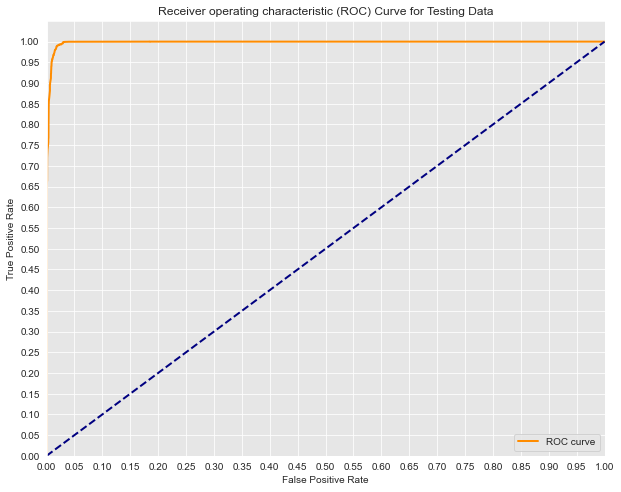

In [57]:
# The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate.
# The AUC, or area under the curve, gives us a singular metric to compare these.
# An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(f_p_r, t_p_r)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

#### Confusion Matrix
The confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives, and False Negatives. Confusion matrices are a very handy tool to help us quickly understand how well a classification model is performing. 

In [58]:
# Create a confusion matrix for testing dataset
cf = confusion_matrix(y_test, y_preds)
cf

array([[9838,  603],
       [   2,  640]])

In [59]:
# Create a classification report to display evaluation metrics
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10441
           1       0.51      1.00      0.68       642

    accuracy                           0.95     11083
   macro avg       0.76      0.97      0.82     11083
weighted avg       0.97      0.95      0.95     11083



In [60]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_preds)

{'TP': 640, 'TN': 9838, 'FP': 603, 'FN': 2}

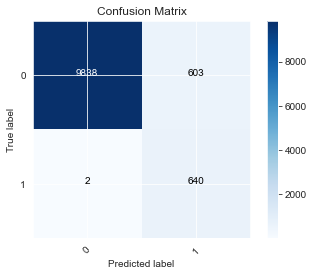

In [61]:
# Plot confusion matrix
plt.imshow(cf,  cmap=plt.cm.Blues) 

# Add titles 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# scale axis'
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cf.max() / 2. 

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment='center',
                 color='white' if cf[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

I have a lot False Negatives.. 

#### Plotting Model Performance

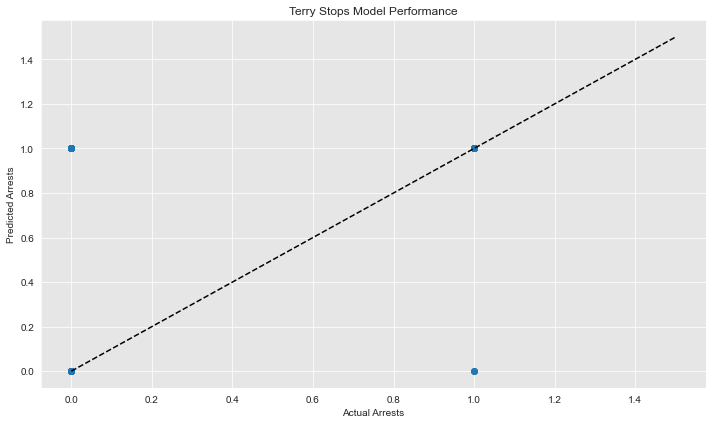

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds)
plt.plot([0, 1.5], [0, 1.5], '--k') # Plot line of best fit
plt.axis('tight') 
plt.title('Terry Stops Model Performance')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

***
## Creating a Model Using Best Features

In [63]:
# find most important features
model.feature_importances_

array([ 4.70101174e-02,  0.00000000e+00,  1.11030855e-01,  0.00000000e+00,
        1.31546809e-04,  5.80001031e-04,  0.00000000e+00,  3.60330903e-07,
        0.00000000e+00,  0.00000000e+00,  3.47465855e-04,  2.25038983e-13,
        2.27792562e-09,  1.02070711e-02,  1.73583287e-03,  0.00000000e+00,
        2.56211577e-05,  0.00000000e+00, -5.83461861e-16,  1.04650941e-04,
        2.16700109e-04,  3.24445113e-05,  8.00934942e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.51005330e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.06656471e-04,
        4.70551160e-05,  3.32018818e-03,  1.95855600e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.90477613e-04,  1.27332094e-05,
        2.15089569e-04,  0.00000000e+00,  0.00000000e+00,  3.86407806e-03,
        0.00000000e+00,  

In [64]:
# make a function to plot feature importances
def plot_feat_importances(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    plt.bar(features, feature_importances)
    plt.xlabel("Features")
    plt.ylabel("Feature Importance Scores")
    plt.title("Feature Importances")
    plt.xticks(rotation=90)
    plt.show()

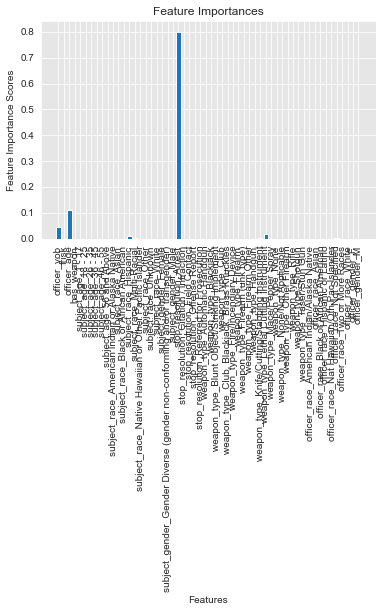

In [65]:
plot_feat_importances(model=model, X_train=X_train)

In [66]:
# Create a list of the best features
feats = ['frisk', 'officer_yob', 'stop_resolution_Arrest']
X_feat_train = X_train[feats]
X_feat_test = X_test[feats]

In [67]:
# check class imbalance
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE()
X_feat_resampled, y_feat_resampled = smote.fit_sample(X_feat_train, y_train)

print('\n')
print(pd.Series(y_feat_resampled).value_counts())

0    31250
1     1998
Name: arrest, dtype: int64


1    31250
0    31250
Name: arrest, dtype: int64


In [68]:
# Fit model
model.fit(X_feat_resampled, y_feat_resampled)

GradientBoostingClassifier()

In [69]:
# Make predictions
y_pred_feat = model.predict(X_feat_test)

***
## Best Model Performance with Best Features

In [70]:
model.score(X_feat_test, y_test)

0.820265271135974

In [71]:
# calculating fpr, tpr, and thresholds for ROC curve of testing data and testing preds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_feat)

# find mean root square error 
print('Test Root Mean Square Error', np.sqrt(mean_squared_error(y_test, y_pred_feat)))

# calculate ROC AUC
print('Test AUC: {}'.format(auc(fpr, tpr)))

Test Root Mean Square Error 0.4239513284140362
Test AUC: 0.9009521980951563


#### Create ROC Curve

AUC: 0.9009521980951563


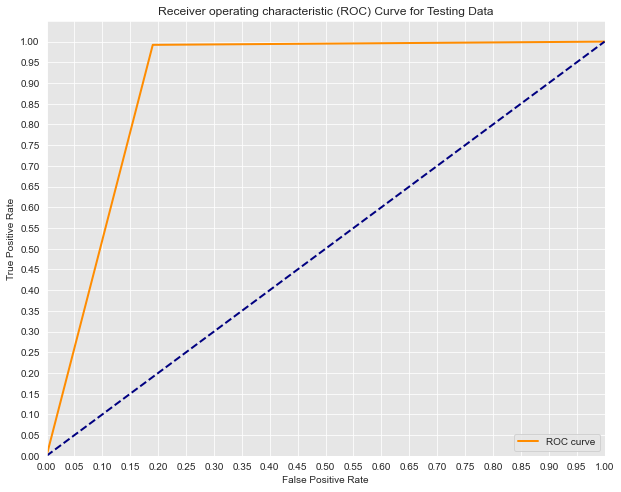

In [72]:
# The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate.
# The AUC, or area under the curve, gives us a singular metric to compare these.
# An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

#### Create confusion matrix

In [73]:
# Create a confusion matrix for testing dataset
cf = confusion_matrix(y_test, y_pred_feat)
cf

array([[8454, 1987],
       [   5,  637]])

In [74]:
# Create a classification report to display evaluation metrics
print(classification_report(y_test, y_pred_feat))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     10441
           1       0.24      0.99      0.39       642

    accuracy                           0.82     11083
   macro avg       0.62      0.90      0.64     11083
weighted avg       0.96      0.82      0.87     11083



Precision went down :/

#### Plot Model Performance

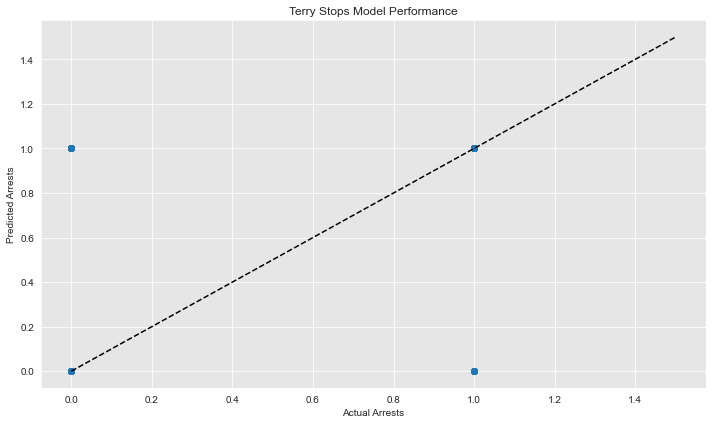

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_feat)
plt.plot([0, 1.5], [0, 1.5], '--k') # Plot line of best fit
plt.axis('tight') 
plt.title('Terry Stops Model Performance')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

## Model Performance of Imbalanced Data
The data has not been balanced with SMOTE( )

In [76]:
# create classifier instance
nonsmote_model = GradientBoostingClassifier()

In [77]:
# fit the model
nonsmote_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
# make predictions
nonsmote_ypred = nonsmote_model.predict(X_test)

In [79]:
# calculate accuracy score for training data
nonsmote_model.score(X_train, y_train)

0.9732916265640038

In [80]:
# calculate accuracy score for training data
nonsmote_model.score(X_test,y_test)

0.9719390056843815

#### Create confusion matrix

In [81]:
cf = confusion_matrix(y_test, nonsmote_ypred)
cf

array([[10379,    62],
       [  249,   393]])

In [82]:
# create a classification report
print(classification_report(y_test, nonsmote_ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10441
           1       0.86      0.61      0.72       642

    accuracy                           0.97     11083
   macro avg       0.92      0.80      0.85     11083
weighted avg       0.97      0.97      0.97     11083



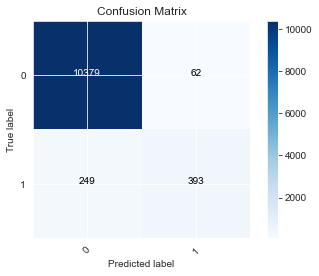

In [83]:
# plot confusion matrix

plt.imshow(cf,  cmap=plt.cm.Blues) 

# add titles 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# scale axis'
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = cf.max() / 2. 

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j],
                 horizontalalignment='center',
                 color='white' if cf[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

#### Plotting Model Performance

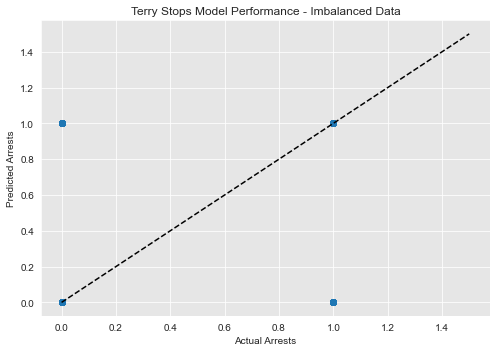

In [84]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, nonsmote_ypred)
plt.plot([0, 1.5], [0, 1.5], '--k')
plt.axis('tight')
plt.title('Terry Stops Model Performance - Imbalanced Data')
plt.xlabel('Actual Arrests')
plt.ylabel('Predicted Arrests')
plt.tight_layout()

#### Plot ROC Curve for testing and training data

Testing AUC: 0.9695658232089466


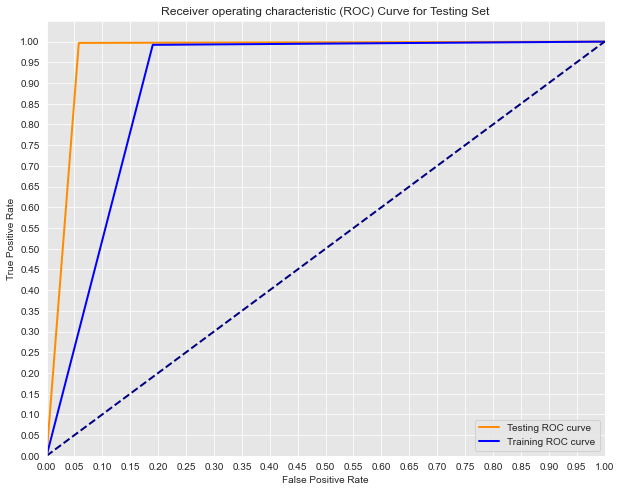

In [85]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(f_p_r, t_p_r, color='darkorange',
         lw=lw, label='Testing ROC curve')
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='Training ROC curve')
fpr, tpr, thresh = roc_curve(y_train_resampled, y_score)
rocauc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Set')
plt.legend(loc='lower right')
print('Testing AUC: {}'.format(auc(f_p_r, t_p_r)))
plt.show()